# Sunspot analysis

In [53]:
library(astsa)
library(TSA)
library(caschrono)
library(forecast)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.Arima       TSA     
  fitted.fracdiff    fracdiff
  plot.Arima         TSA     
  residuals.fracdiff fracdiff

Attaching package: ‘forecast’

The following object is masked from ‘package:astsa’:

    gas



In [13]:
options(repr.plot.width=4, repr.plot.height=4, cex = 0.3)

In [7]:
Sunspot <- scan('Data/Sunspot_1700_2001.txt', skip = 3)
Sunspot_ts <- ts(Sunspot, start=c(1700,1), frequency=1)

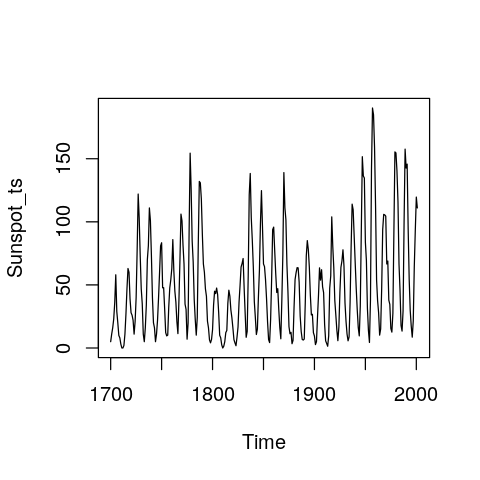

In [14]:
plot.ts(Sunspot_ts, type='l')

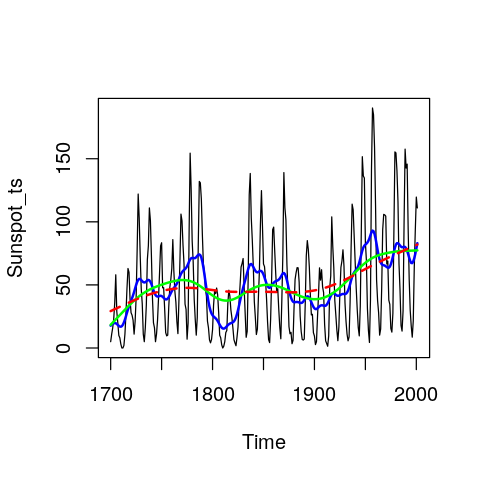

In [28]:
plot(Sunspot_ts, type = 'l')
lines(smooth.spline(time(Sunspot_ts),Sunspot_ts, spar=.5), lwd=2, col=4)
lines(smooth.spline(time(Sunspot_ts), Sunspot_ts, spar=.85), lwd=2, col="green")
lines(smooth.spline(time(Sunspot_ts), Sunspot_ts, spar= 1), lty=2, lwd=2, col="red")

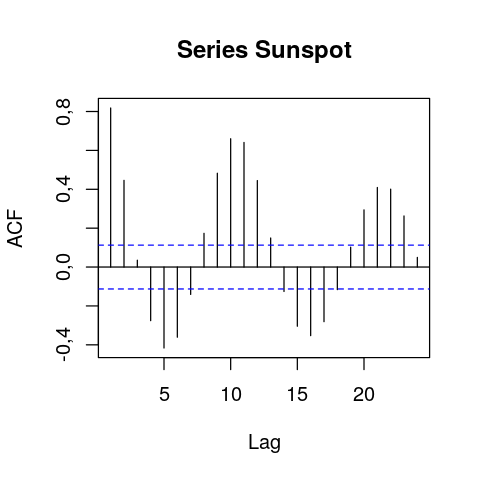

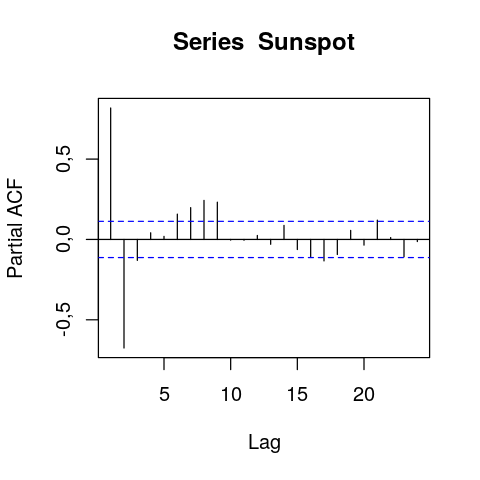

LAG,ACF1,PACF
1,"0,818092613","0,8180926131"
2,"0,445880085","-0,6754729515"
3,"0,035162871","-0,1301361636"
4,"-0,275685694","0,0413876671"
5,"-0,416351956","0,0191181297"
6,"-0,360826647","0,1574829027"
7,"-0,140721783","0,1979761016"
8,"0,173421910","0,2429883765"
9,"0,482520596","0,2319069616"
10,"0,659941472","-0,0038331677"


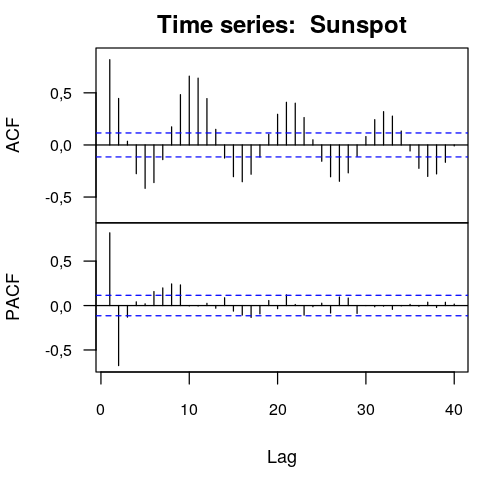

In [37]:
acf(Sunspot)
pacf(Sunspot)
acf2y(Sunspot)

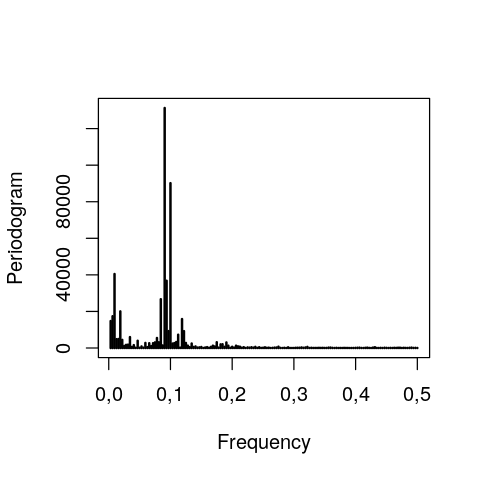

In [41]:
perio = periodogram(Sunspot)
abline(h=0)

In [42]:
(length(perio$freq))

[1] 160

[1] 160

[1] 0,090625


[1] 11,03448

[1] 29

[1] 3

[1] 0,009375


[1] 106,6667

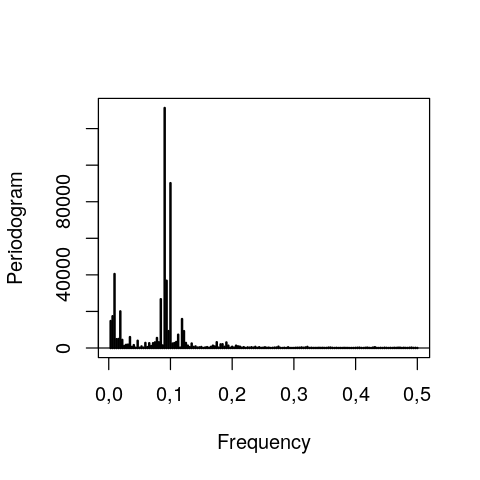

In [49]:
perio<- periodogram(Sunspot)
abline(h=0)
(length(perio$freq))
x0<- perio$freq[which.max(perio$spec)]
print(x0)
(1/x0)
(ind<- which.max(perio$spec))
x1<- perio$freq[which.max(perio$spec[0:20])]
which.max(perio$spec[0:20])
print(x1)
(1/x1)

In [50]:
### COMMENTS

# the variance seems rather constant
# even we have an exceptional peak in 1957
# lowess shows an increasing trend

# the slow decreasing for the ACF function  suggests
# nonstationarity
# the damped sinus for the ACF is typical of an AR part with complex roots
# of the autoreg polynomial
# the fact that the PACF has two first terms rather high together with
# the slow decreasing of the ACF suggests a trend and demands for differentiation
# together with the ACF behaviour suggests an ARMA part in the model

# Perio: 
# a main peak at f=0.0906 that is period= 1\f = 11.03 that is
# an important periodic component with approximate period 11 years
# this 11 years period is confirmed by a large value of the ACF at lag 11
# a secondary peak at f=0.009375, that is period=106.7
# this is confirmed by lowess with f=0.3
# the behaviour at low frequencies suggest a trend
# the peak in weak frequencies suggest a long period
# that is nonstationnarity

# All of that suggest an ARIMA model



# looking for a transform of Sunspot (Wei proposes the square root),
# BoxCox finds 0.39




[1] "B transformation"


ACF,PACF
"0,82","0,82"
"0,46","-0,66"
"0,07","-0,12"
"-0,24","-0,02"
"-0,41","-0,02"
"-0,39","0,19"
"-0,19","0,19"
"0,10","0,19"
"0,42","0,28"
"0,63","0,02"


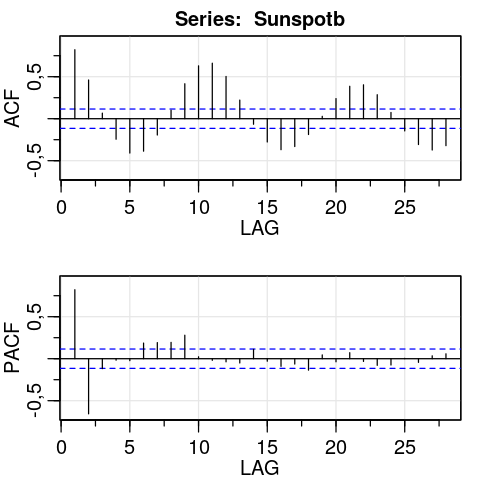

ACF,PACF
"0,82","0,82"
"0,46","-0,68"
"0,05","-0,12"
"-0,26","0,01"
"-0,42","-0,02"
"-0,39","0,20"
"-0,19","0,19"
"0,12","0,20"
"0,44","0,27"
"0,65","0,00"


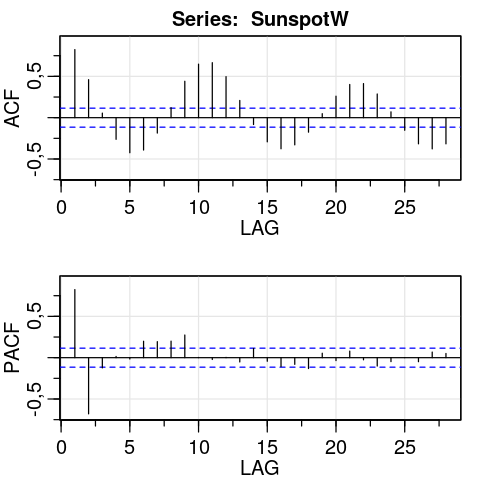

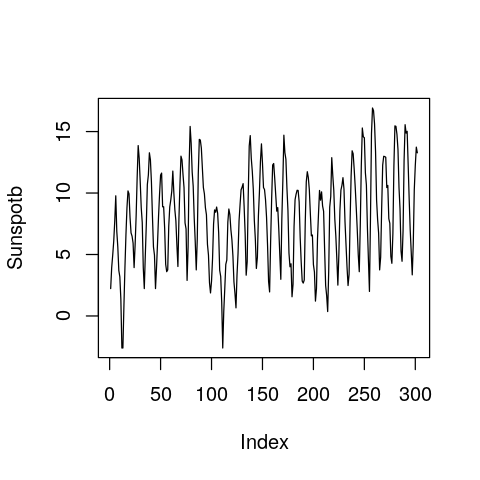

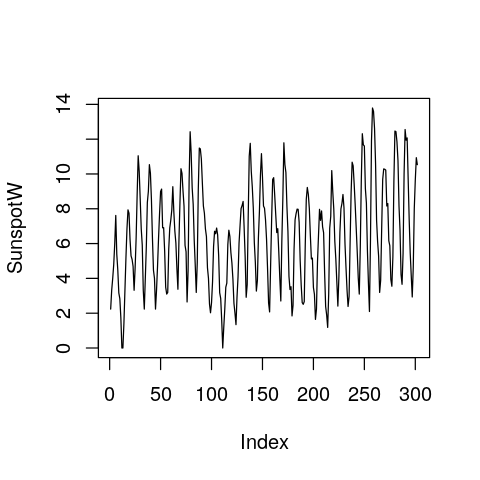

In [56]:
lambda <- BoxCox.lambda(Sunspot)  
#lambda
print('B transformation')
Sunspotb <- BoxCox(Sunspot,lambda)# data data Sunspot transformed with the optimal lambda (0.39)
acf2(Sunspotb)
#print('Wei tranformation (sqrt)')
SunspotW<- sqrt(Sunspot) # Wei
acf2(SunspotW)  #closed results
#print('B transformation plot')
plot(Sunspotb,type="l")
#print('Wei transformation plot')
plot(SunspotW,type="l")

In [52]:
??BoxCox

ar1        ar2        ma1        ma2        ma3 
 1,6102055 -0,9336218 -1,4337668  0,4501586  0,1276248

LAG,ACF1,PACF
1,"0,0028164717","0,0028164717"
2,"-0,0100351792","-0,0100431914"
3,"-0,1149612584","-0,1149169271"
4,"0,0675315178","0,0688688995"
5,"0,0582763425","0,0562514310"
6,"0,0129824792","0,0001878387"
7,"-0,0446496193","-0,0290339121"
8,"-0,1654086170","-0,1599366185"
9,"0,0273165368","0,0231030553"
10,"0,0549904867","0,0441230574"



Call:
arima(x = Sunspot, order = c(2, 1, 3))

Coefficients:
         ar1      ar2      ma1     ma2     ma3
      1,6102  -0,9336  -1,4338  0,4502  0,1276
s.e.  0,0245   0,0233   0,0606  0,0971  0,0557

sigma^2 estimated as 238:  log likelihood = -1252,19,  aic = 2514,37

Training set error measures:


Warning message in trainingaccuracy(f, test, d, D):
“test elements must be within sample”

              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN


ar1        ar2        ma1        ma2 
 1,6046169 -0,9357831 -1,5094181  0,6343776

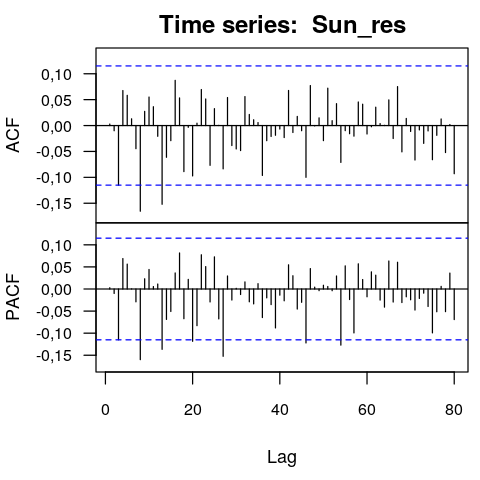

LAG,ACF1,PACF
1,"0,082607568","0,082607568"
2,"-0,086779068","-0,094246215"
3,"-0,131978249","-0,118197870"
4,"0,075392339","0,091041079"
5,"0,101133209","0,068482763"
6,"0,045779332","0,029464559"
7,"-0,044753373","-0,018675126"
8,"-0,158507541","-0,139682204"
9,"0,031472741","0,049450451"
10,"0,086667857","0,044004328"



Call:
arima(x = Sunspot, order = c(2, 1, 2))

Coefficients:
         ar1      ar2      ma1     ma2
      1,6046  -0,9358  -1,5094  0,6344
s.e.  0,0262   0,0240   0,0646  0,0700

sigma^2 estimated as 242,1:  log likelihood = -1254,72,  aic = 2517,44

Training set error measures:


Warning message in trainingaccuracy(f, test, d, D):
“test elements must be within sample”

              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN


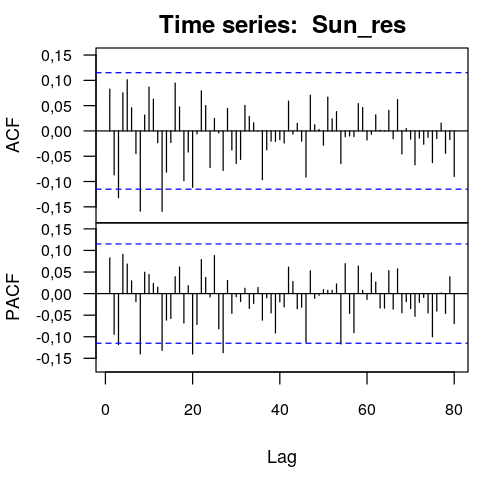

In [57]:

#trying some ARIMA models  
# let the students try models

arima213<- arima(Sunspot,order=c(2,1,3)) 
arima213$coef
Sun_res<- arima213$resid
acf2y(Sun_res,80)  # residuals seem rather well
summary(arima213)

arima212<- arima(Sunspot,order=c(2,1,2)) 
arima212$coef
Sun_res<- arima212$resid
acf2y(Sun_res,80)  # residuals seem rather well
summary(arima212)

ACF,PACF
"0,82","0,82"
"0,46","-0,68"
"0,05","-0,12"
"-0,26","0,01"
"-0,42","-0,02"
"-0,39","0,20"
"-0,19","0,19"
"0,12","0,20"
"0,44","0,27"
"0,65","0,00"


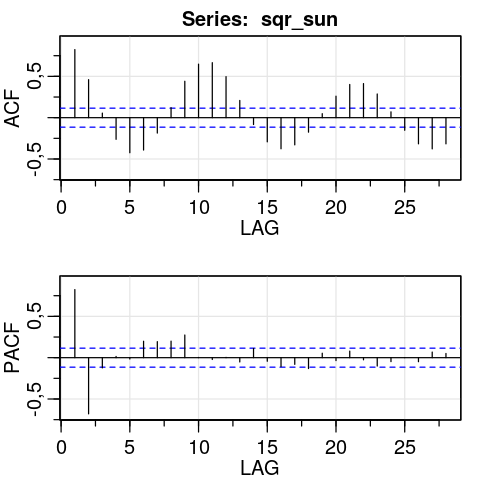

Series: sqr_sun 
ARIMA(5,1,5) 

Coefficients:
          ar1     ar2     ar3      ar4      ar5     ma1      ma2      ma3
      -0,2092  0,7123  0,1327  -0,7202  -0,2944  0,4918  -0,8156  -0,8746
s.e.   0,2210  0,0851  0,1226   0,0585   0,1704  0,2085   0,0768   0,1340
         ma4     ma5
      0,3692  0,4498
s.e.  0,1243  0,1250

sigma^2 estimated as 1,124:  log likelihood=-441,53
AIC=905,05   AICc=905,96   BIC=945,83

Training set error measures:
                     ME     RMSE       MAE  MPE MAPE      MASE        ACF1
Training set 0,02862008 1,040599 0,8170433 -Inf  Inf 0,5756419 -0,01071894


[1] 905,0501

[1] 905,9636

[1] 945,8283

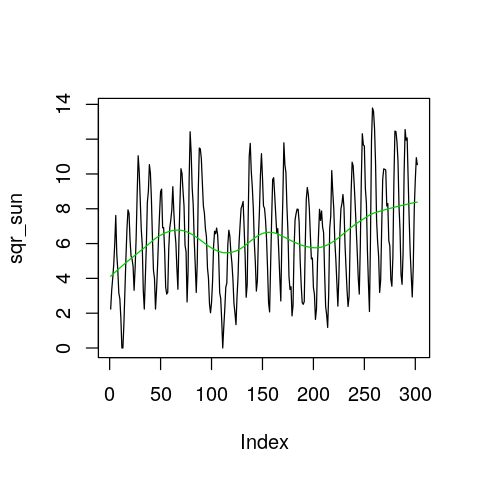

In [58]:

# trial with a preliminary transform by square root
# the log transform is not useful due to some values of Sunspot near 0
sqr_sun<- sqrt(Sunspot)
acf2(sqr_sun)
plot(sqr_sun,type="l")
lines(lowess(sqr_sun, f = .3), col = 3)
model_auto<-auto.arima(sqr_sun)  #  ARIMA(5,1,5) 
summary(model_auto)  # ar3 is non significant and ar1 is on teh boundary
model_auto$aic
model_auto$aicc  
model_auto$bic  # to be compared with models in the above part